# 35. Нейронные сети и глубокое обучение

На этой неделе мы узнаем о нейронных сетях и построим модель для классификации изображений одежды.


## 35.1 Классификация одежды

## Датасет

* Ссылка на full (Google Drive): https://drive.google.com/file/d/1IATFPd6JoCe3W-Fdlf1ac6iyGuLwXet1/view?usp=sharing
* Ссылка на small (Google Drive): https://drive.google.com/file/d/1lgVaHvmhbtd4vZDQ-xP_jwdRsWhuQzJ_/view?usp=sharing

# Визуализация нейронных сетей:

* https://www.youtube.com/watch?v=RJCIYBAAiEI&t=266s&ab_channel=3Blue1BrowntranslatedbySciberia

## 35.2 TensorFlow и Keras

* Установка TensorFlow
* Загрузка изображений

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.15.0'

In [6]:
from tensorflow.keras.preprocessing.image import load_img

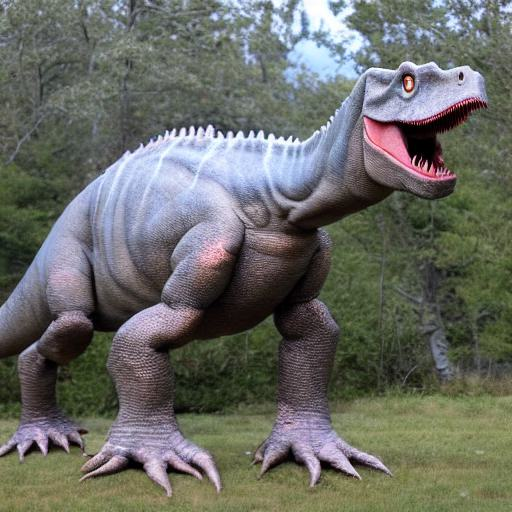

In [7]:
path = '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/test/dino'
name = '630d7b14-e20c-4985-81f5-649a0723737c.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


In [8]:
img = load_img(fullname, target_size=(299, 299))

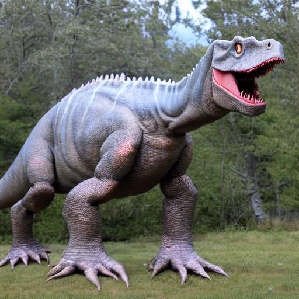

In [9]:
img

In [10]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x780D3C2CB340>


array([[[150, 160, 162],
        [149, 157, 168],
        [178, 185, 204],
        ...,
        [ 93, 103, 105],
        [ 77,  90, 107],
        [116, 130, 157]],

       [[137, 145, 148],
        [173, 179, 191],
        [118, 123, 143],
        ...,
        [105, 115, 124],
        [102, 115, 134],
        [166, 180, 207]],

       [[110, 118, 120],
        [112, 119, 127],
        [162, 167, 186],
        ...,
        [178, 189, 209],
        [173, 188, 211],
        [213, 229, 255]],

       ...,

       [[134, 135,  93],
        [127, 128,  84],
        [132, 133,  89],
        ...,
        [112, 125,  81],
        [114, 127,  83],
        [122, 135,  91]],

       [[125, 126,  84],
        [115, 116,  74],
        [120, 121,  77],
        ...,
        [120, 131,  88],
        [115, 126,  83],
        [114, 125,  82]],

       [[106, 108,  68],
        [109, 112,  69],
        [113, 116,  71],
        ...,
        [110, 119,  74],
        [122, 131,  86],
        [135, 144,  99]]], dtype=uint8)
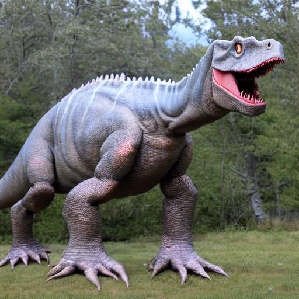

In [11]:
x = np.array(img)
x

In [12]:
x.shape

(299, 299, 3)

## 35.3 Предварительно обученные сверточные нейронные сети (convolutional neural networks)

* Набор данных Imagenet: https://www.image-net.org/
* Предварительно обученные модели: https://keras.io/api/applications/


In [13]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [14]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 5s 0us/step


In [15]:
X = np.array([x])

In [16]:
X

array([[[[150, 160, 162],
         [149, 157, 168],
         [178, 185, 204],
         ...,
         [ 93, 103, 105],
         [ 77,  90, 107],
         [116, 130, 157]],

        [[137, 145, 148],
         [173, 179, 191],
         [118, 123, 143],
         ...,
         [105, 115, 124],
         [102, 115, 134],
         [166, 180, 207]],

        [[110, 118, 120],
         [112, 119, 127],
         [162, 167, 186],
         ...,
         [178, 189, 209],
         [173, 188, 211],
         [213, 229, 255]],

        ...,

        [[134, 135,  93],
         [127, 128,  84],
         [132, 133,  89],
         ...,
         [112, 125,  81],
         [114, 127,  83],
         [122, 135,  91]],

        [[125, 126,  84],
         [115, 116,  74],
         [120, 121,  77],
         ...,
         [120, 131,  88],
         [115, 126,  83],
         [114, 125,  82]],

        [[106, 108,  68],
         [109, 112,  69],
         [113, 116,  71],
         ...,
         [110, 119,  74],
        

In [17]:
X.shape

(1, 299, 299, 3)

In [18]:
X = preprocess_input(X)

In [19]:
X

array([[[[ 0.17647064,  0.254902  ,  0.27058828],
         [ 0.1686275 ,  0.2313726 ,  0.3176471 ],
         [ 0.39607847,  0.45098042,  0.6       ],
         ...,
         [-0.27058822, -0.19215685, -0.17647058],
         [-0.3960784 , -0.29411763, -0.1607843 ],
         [-0.09019607,  0.0196079 ,  0.2313726 ]],

        [[ 0.07450986,  0.13725495,  0.16078436],
         [ 0.35686278,  0.4039216 ,  0.49803925],
         [-0.0745098 , -0.03529412,  0.12156868],
         ...,
         [-0.17647058, -0.09803921, -0.02745098],
         [-0.19999999, -0.09803921,  0.05098045],
         [ 0.30196083,  0.41176474,  0.62352943]],

        [[-0.1372549 , -0.0745098 , -0.05882353],
         [-0.12156862, -0.06666666, -0.00392157],
         [ 0.27058828,  0.30980396,  0.45882356],
         ...,
         [ 0.39607847,  0.48235297,  0.6392157 ],
         [ 0.35686278,  0.47450984,  0.654902  ],
         [ 0.67058825,  0.79607844,  1.        ]],

        ...,

        [[ 0.05098045,  0.05882359, -0

In [20]:
pred = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [21]:
pred

array([[1.07107015e-04, 1.46512521e-05, 8.26727191e-05, 3.55970260e-05,
        3.72071395e-06, 3.46830675e-05, 5.72166118e-06, 5.33644888e-05,
        2.90639764e-05, 2.07678804e-05, 2.51100901e-05, 1.21439753e-05,
        1.56339283e-05, 1.09032544e-05, 1.11199242e-05, 1.70822132e-05,
        1.69584946e-05, 1.48424879e-05, 1.05044737e-05, 1.85274021e-05,
        2.41027683e-05, 1.88545728e-05, 3.27840426e-05, 4.87919315e-05,
        2.41710659e-05, 1.96886213e-05, 1.68384591e-04, 1.97534318e-05,
        4.02029909e-05, 5.76103739e-05, 1.14054084e-04, 3.09899442e-05,
        3.13076598e-04, 1.22067402e-04, 1.03255981e-04, 3.19797255e-04,
        2.22554649e-04, 7.16352806e-05, 3.88904708e-04, 3.58054154e-02,
        1.46230004e-05, 8.09802586e-05, 6.40979997e-05, 1.79326604e-03,
        1.85418699e-04, 1.98734851e-04, 6.36746845e-05, 5.89797506e-03,
        5.96147962e-03, 1.40806165e-04, 3.03856912e-04, 9.08442199e-01,
        1.10734663e-05, 1.45613494e-05, 1.74926772e-05, 2.184710

In [22]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n01704323', 'triceratops', 0.9084422),
  ('n01677366', 'common_iguana', 0.035805415),
  ('n02398521', 'hippopotamus', 0.006276547),
  ('n01695060', 'Komodo_dragon', 0.0059614796),
  ('n01694178', 'African_chameleon', 0.005897975)]]

## 35.4 Сверточные нейронные сети (Convolutional Neural Networks (CNN))

* Типы слоев: сверточные (convolutional) и полносвязные (dense)
* Сверточные слои (Convolutional layers) и фильтры
* Полносвязные слои (Dense layers)

Есть и другие слои. Читайте здесь: https://cs231n.github.io/

## 35.5 Перенос обучения (Transfer Learning)

* Чтение данных с помощью ImageDataGenerator
* Обучение Xception на изображениях меньшего размера (150x150)


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/train',
    target_size=(150, 150),
    batch_size=32
)

Found 1594 images belonging to 2 classes.


In [26]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [27]:
X, y = next(train_ds)

In [28]:
y[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
X.shape

(32, 150, 150, 3)

In [30]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 20 images belonging to 2 classes.


In [31]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalMaxPooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 4s 0us/step


In [32]:
learning_rate = 0.05
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [33]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
50/50 [==============================] - 811s 16s/step - loss: 0.6351 - accuracy: 0.9699 - val_loss: 3.3924 - val_accuracy: 0.8500
Epoch 2/5
50/50 [==============================] - 11s 218ms/step - loss: 0.4110 - accuracy: 0.9843 - val_loss: 2.6465 - val_accuracy: 0.9000
Epoch 3/5
50/50 [==============================] - 11s 211ms/step - loss: 0.2785 - accuracy: 0.9912 - val_loss: 0.3742 - val_accuracy: 1.0000
Epoch 4/5
50/50 [==============================] - 11s 216ms/step - loss: 0.1147 - accuracy: 0.9962 - val_loss: 0.9454 - val_accuracy: 0.9000
Epoch 5/5
50/50 [==============================] - 10s 202ms/step - loss: 0.3333 - accuracy: 0.9887 - val_loss: 1.1213 - val_accuracy: 1.0000


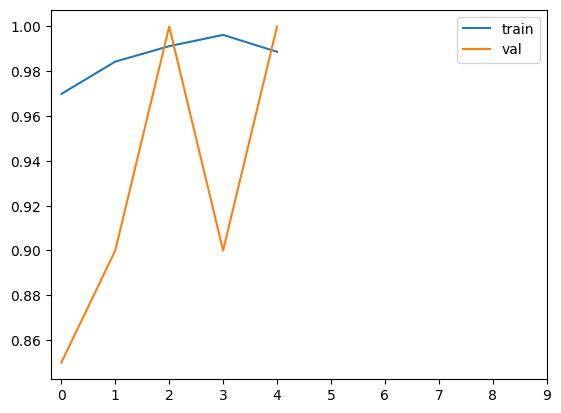

In [34]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 35.6 Корректировка скорости обучения

* Что такое скорость обучения
* Пробуем разные значения

In [35]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum = 0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [36]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
50/50 [==============================] - 14s 234ms/step - loss: 0.6802 - accuracy: 0.6198 - val_loss: 0.7484 - val_accuracy: 0.4000
Epoch 2/10
50/50 [==============================] - 11s 210ms/step - loss: 0.5668 - accuracy: 0.7635 - val_loss: 0.6983 - val_accuracy: 0.6000
Epoch 3/10
50/50 [==============================] - 10s 189ms/step - loss: 0.4898 - accuracy: 0.8494 - val_loss: 0.6581 - val_accuracy: 0.6500
Epoch 4/10
50/50 [==============================] - 10s 208ms/step - loss: 0.4314 - accuracy: 0.9003 - val_loss: 0.6249 - val_accuracy: 0.6500
Epoch 5/10
50/50 [==============================] - 11s 210ms/step - loss: 0.3854 - accuracy: 0.9272 - val_loss: 0.5972 - val_accuracy: 0.6500
Epoch 6/10
50/50 [==============================] - 10s 209ms/step - loss: 0.3491 - accuracy: 0.9398 - val_loss: 0.5737 - val_accuracy: 0.7000
Epoch 7/10
50/50 [==============================] - 11s 212ms/step - loss: 0.3195 - accuracy: 0.9504 - val_loss: 0.5535 - val_accuracy:

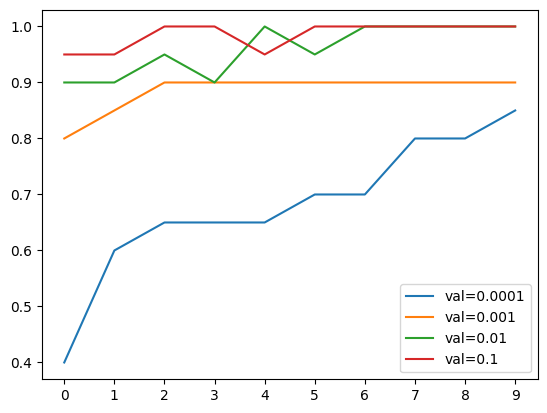

In [37]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [38]:
del scores[0.1]
del scores[0.0001]

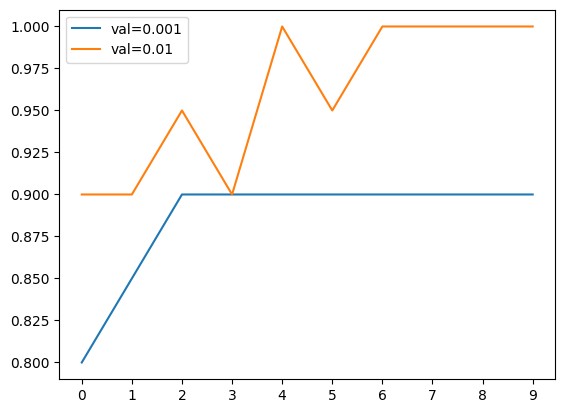

In [39]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [40]:
learning_rate = 0.001

## 35.7 Создание контрольных точек

* Сохранение лучшей модели
* Обучение модели с обратными вызовами (callbacks)

In [41]:
model.save_weights('model_v1.h5', save_format='h5')

In [42]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [43]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.8400

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 15s 247ms/step - loss: 0.4375 - accuracy: 0.8400 - val_loss: 0.4949 - val_accuracy: 0.7500
Epoch 2/10
50/50 [==============================] - 11s 229ms/step - loss: 0.1947 - accuracy: 0.9661 - val_loss: 0.4077 - val_accuracy: 0.9000
Epoch 3/10
50/50 [==============================] - 10s 208ms/step - loss: 0.1401 - accuracy: 0.9686 - val_loss: 0.3664 - val_accuracy: 0.9000
Epoch 4/10
50/50 [==============================] - 10s 193ms/step - loss: 0.1151 - accuracy: 0.9762 - val_loss: 0.3380 - val_accuracy: 0.9000
Epoch 5/10
50/50 [==============================] - 10s 209ms/step - loss: 0.0999 - accuracy: 0.9762 - val_loss: 0.3162 - val_accuracy: 0.9000
Epoch 6/10
50/50 [==============================] - 11s 212ms/step - loss: 0.0897 - accuracy: 0.9780 - val_loss: 0.3004 - val_accuracy: 0.9000
Epoch 7/10
50/50 [==============================] - 15s 296ms/step - loss: 0.0819 - accuracy: 0.9818 - val_loss: 0.2886 - val_accuracy: 0.9000
Epoch 8/10

## 35.8 Добавление дополнительных слоёв

* Добавление одного внутреннего полносвязного слоя
* Экспериментирование с разными размерами внутреннего слоя

In [44]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalMaxPooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(2)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    loss = keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [45]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
50/50 [==============================] - 14s 229ms/step - loss: 0.5413 - accuracy: 0.8005 - val_loss: 0.5298 - val_accuracy: 0.8000
Epoch 2/10
50/50 [==============================] - 10s 206ms/step - loss: 0.2802 - accuracy: 0.9310 - val_loss: 0.4697 - val_accuracy: 0.9000
Epoch 3/10
50/50 [==============================] - 10s 198ms/step - loss: 0.1917 - accuracy: 0.9567 - val_loss: 0.4250 - val_accuracy: 0.9000
Epoch 4/10
50/50 [==============================] - 10s 198ms/step - loss: 0.1509 - accuracy: 0.9680 - val_loss: 0.3976 - val_accuracy: 0.9000
Epoch 5/10
50/50 [==============================] - 10s 204ms/step - loss: 0.1277 - accuracy: 0.9724 - val_loss: 0.3822 - val_accuracy: 0.9000
Epoch 6/10
50/50 [==============================] - 10s 205ms/step - loss: 0.1120 - accuracy: 0.9737 - val_loss: 0.3727 - val_accuracy: 0.9000
Epoch 7/10
50/50 [==============================] - 10s 190ms/step - loss: 0.1009 - accuracy: 0.9793 - val_loss: 0.3587 - val_accuracy: 0.9

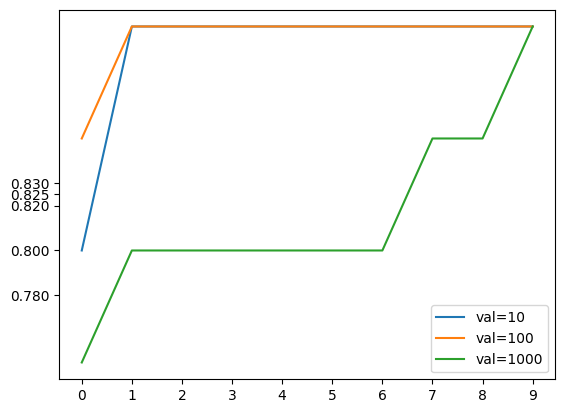

In [46]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 35.9 Регуляризация и dropout

* Регуляризация путем замораживания части сети
* Добавление dropout в нашу модель
* Экспериментирование с разными значениями

In [47]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalMaxPooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(2)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    loss = keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [48]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
50/50 [==============================] - 16s 248ms/step - loss: 0.6174 - accuracy: 0.7277 - val_loss: 0.6534 - val_accuracy: 0.6000
Epoch 2/30
50/50 [==============================] - 10s 204ms/step - loss: 0.3003 - accuracy: 0.9247 - val_loss: 0.5035 - val_accuracy: 0.8500
Epoch 3/30
50/50 [==============================] - 11s 210ms/step - loss: 0.2059 - accuracy: 0.9517 - val_loss: 0.4441 - val_accuracy: 0.8000
Epoch 4/30
50/50 [==============================] - 10s 204ms/step - loss: 0.1614 - accuracy: 0.9611 - val_loss: 0.3989 - val_accuracy: 0.8000
Epoch 5/30
50/50 [==============================] - 10s 206ms/step - loss: 0.1352 - accuracy: 0.9686 - val_loss: 0.3649 - val_accuracy: 0.8000
Epoch 6/30
50/50 [==============================] - 10s 207ms/step - loss: 0.1178 - accuracy: 0.9724 - val_loss: 0.3427 - val_accuracy: 0.8500
Epoch 7/30
50/50 [==============================] - 10s 209ms/step - loss: 0.1055 - accuracy: 0.9755 - val_loss: 0.3237 - val_accuracy: 0.

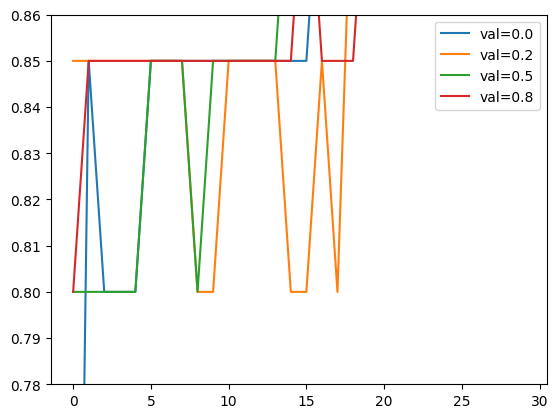

In [49]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

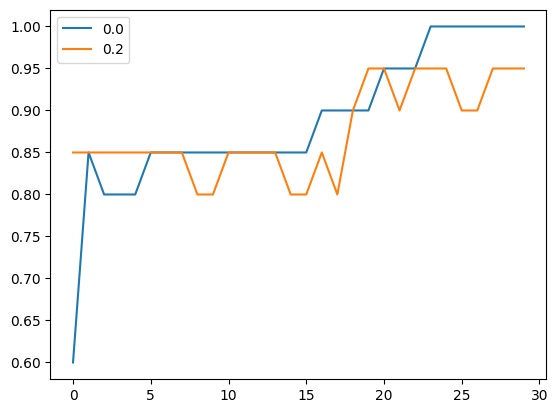

In [50]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 35.10 Аугментация данных

* Различные методы аугментации данных
* Обучение модели с аугментациями
* Как выбирать методы аугментации данных?

In [52]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 1594 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [53]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
50/50 [==============================] - 17s 256ms/step - loss: 0.6425 - accuracy: 0.7177 - val_loss: 0.8777 - val_accuracy: 0.6500
Epoch 2/50
50/50 [==============================] - 10s 207ms/step - loss: 0.3271 - accuracy: 0.9040 - val_loss: 0.7034 - val_accuracy: 0.7500
Epoch 3/50
50/50 [==============================] - 11s 210ms/step - loss: 0.2297 - accuracy: 0.9391 - val_loss: 0.6177 - val_accuracy: 0.7500
Epoch 4/50
50/50 [==============================] - 11s 211ms/step - loss: 0.1796 - accuracy: 0.9561 - val_loss: 0.5586 - val_accuracy: 0.8000
Epoch 5/50
50/50 [==============================] - 10s 206ms/step - loss: 0.1555 - accuracy: 0.9617 - val_loss: 0.5097 - val_accuracy: 0.8500
Epoch 6/50
50/50 [==============================] - 11s 209ms/step - loss: 0.1383 - accuracy: 0.9617 - val_loss: 0.4756 - val_accuracy: 0.8500
Epoch 7/50
50/50 [==============================] - 11s 226ms/step - loss: 0.1228 - accuracy: 0.9668 - val_loss: 0.4389 - val_accuracy: 0.8500

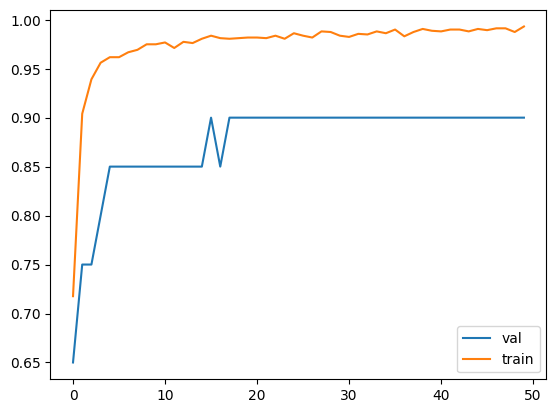

In [54]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 35.11 Обучение более крупной модели

* Обучение модели размером 299x299

In [55]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalMaxPooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(2)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    loss = keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [56]:
input_size = 299

In [57]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 1594 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [58]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [59]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.7336 - accuracy: 0.6587

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 64s 1s/step - loss: 0.7336 - accuracy: 0.6587 - val_loss: 0.6758 - val_accuracy: 0.7500
Epoch 2/50
50/50 [==============================] - 47s 949ms/step - loss: 0.4799 - accuracy: 0.8331 - val_loss: 0.6029 - val_accuracy: 0.7000
Epoch 3/50
50/50 [==============================] - 45s 904ms/step - loss: 0.3554 - accuracy: 0.9084 - val_loss: 0.5112 - val_accuracy: 0.8000
Epoch 4/50
50/50 [==============================] - 47s 937ms/step - loss: 0.2987 - accuracy: 0.9178 - val_loss: 0.4733 - val_accuracy: 0.8000
Epoch 5/50
50/50 [==============================] - 46s 916ms/step - loss: 0.2475 - accuracy: 0.9429 - val_loss: 0.4367 - val_accuracy: 0.8500
Epoch 6/50
50/50 [==============================] - 46s 926ms/step - loss: 0.2190 - accuracy: 0.9473 - val_loss: 0.3789 - val_accuracy: 0.9000
Epoch 7/50
50/50 [==============================] - 47s 934ms/step - loss: 0.1912 - accuracy: 0.9567 - val_loss: 0.4054 - val_accuracy: 0.8000
Epoch 8/50
50

## 35.12 Использование модели

* Загрузка модели
* Оценка модели
* Получение прогнозов

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [62]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 394 images belonging to 2 classes.


In [63]:
model = keras.models.load_model('/content/xception_v4_1_20_0.950.h5')

In [64]:
model.evaluate(test_ds)

13/13 [==============================] - 7s 471ms/step - loss: 0.0722 - accuracy: 0.9873


[0.07220236212015152, 0.9873096346855164]

In [65]:
path = '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/test/dragon/99155bd0-ef4d-4f51-be07-ec683945e480.jpg'

In [66]:
img = load_img(path, target_size=(299, 299))

In [67]:
import numpy as np

In [68]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [69]:
X = preprocess_input(X)

In [70]:
pred = model.predict(X)

1/1 [==============================] - 1s 946ms/step


In [71]:
classes = [
    'dino',
    'dragon'
]

In [72]:
dict(zip(classes, pred[0]))

{'dino': -3.8068979, 'dragon': 3.4529738}

## 35.13 Итог

* Мы можем использовать предварительно обученные модели для общей классификации изображений
* Сверточные слои позволяют преобразовать изображение в вектор
* Полносвязные слои используют этот вектор для выработки прогнозов
* Вместо обучения модели с нуля, мы можем использовать перенос обучения и повторно использовать уже обученные сверточные слои
* Сначала обучите маленькую модель (150x150), прежде чем обучать большую (299x299)
* Скорость обучения - насколько быстро обучается модель. Быстрые ученики не всегда являются лучшими
* Мы можем сохранять лучшую модель с помощью обратных вызовов и создания контрольных точек
* Чтобы избежать переобучения, используйте dropout и аугментацию.

## 35.14 Исследуйте дальше

* Добавьте больше данных, например, Zalando и т.д.
* Albumentations - другой способ создания аугментаций
* Используйте PyTorch или MXNet вместо TensorFlow/Keras
* Помимо Xception, существуют другие архитектуры - попробуйте их
Другие проекты:

* Коты против собак
* Хотдог или не хотдог
* Категории изображений

